In [2]:
from main import generateRandomInstances
from main import showgrid
from collections import deque
import heapq
import numpy as np
import matplotlib.pyplot as plt
import time


- AYED Hatem 21316185
- ZHANG Zhile 21201131

## Partie 1

#### Question 4 ###

Nombre de coups minimum : 2


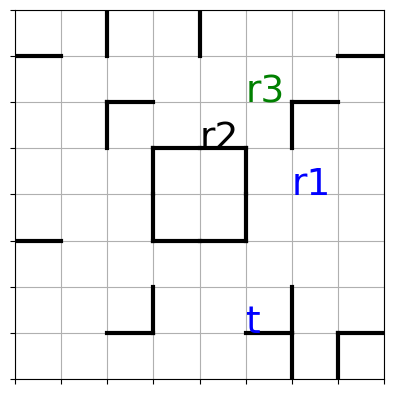

In [13]:
def valid_move(x, y, direction, verticaux, horizontaux,cellules, n):
    if direction == 'up':
        if y == 0: # On ne peut monter si nous sommes déjà en haut du plateau
            return(False)
        return not horizontaux[y-1][x] and (cellules[y-1][x] == 0 or cellules[y-1][x] == -1) # Il faut qu'il n'y ait ni mur ni robot au-dessus
    elif direction == 'down':
        if y == n-1: 
            return(False)
        return not horizontaux[y][x] and (cellules[y+1][x] == 0 or cellules[y+1][x] == -1)
    elif direction == 'left':
        if x == 0: # On ne peut aller à gauche si nous sommes à l'extrémité gauche du plateau
            return(False)
        return not verticaux[y][x-1] and (cellules[y][x-1] == 0 or cellules[y][x-1] == -1)
    elif direction == 'right':
        if x == n-1:
            return(False)
        return not verticaux[y][x] and (cellules[y][x+1] == 0 or cellules[y][x+1] == -1)
    return False

def move(x, y, direction):
    if direction == 'up':
        return (x, y-1)
    elif direction == 'down':
        return (x, y+1)
    elif direction == 'left':
        return (x-1, y)
    elif direction == 'right':
        return (x+1, y)

def bfs(cellules, verticaux, horizontaux, n):
    start_pos = None
    target_pos = None
    for i in range(n):
        for j in range(n):
            if cellules[i][j] == 1:  # Robot bleu
                start_pos = (j, i)  # (x, y)
            elif cellules[i][j] == -1:  # Cible
                target_pos = (j, i)
    
    queue = deque([((start_pos, 0, cellules))])  # (position, steps, configuration du plateau)
    visited = set([start_pos])
    
    while queue:
        (x, y), steps, cellules = queue.popleft()
        if (x, y) == target_pos:
            return steps
        for direction in ['up', 'down', 'left', 'right']:
            new_x, new_y = x, y
            while valid_move(new_x, new_y, direction, verticaux, horizontaux, cellules, n):
                new_x, new_y = move(new_x, new_y, direction)
            if (new_x, new_y) == target_pos:  # Si la cible est atteinte
                return steps + 1
            if (new_x, new_y) not in visited:
                visited.add((new_x, new_y))
                new_cellules = np.where(cellules == 1, 0, cellules) # On met le plateau à jour 
                new_cellules[new_y,new_x] = 1
                queue.append(((new_x, new_y), steps + 1, new_cellules))
    return -1  # Aucune solution n'a été trouvée.


n = 8
k = 3
cellules, verticaux, horizontaux = generateRandomInstances(n, k)
print("Nombre de coups minimum :", bfs(cellules, verticaux, horizontaux, n))
showgrid(n,cellules,verticaux,horizontaux)

### Question 5 ###

In [14]:

def update_board(robots_pos,n,target_pos):
    cellules = np.zeros((n,n),dtype=int)
    x,y = target_pos
    cellules[y][x] = -1
    for k,(x,y) in enumerate(robots_pos):
        cellules[y][x] = k+1
    return cellules

def bfs2(cellules, verticaux, horizontaux, n, k):
    start_pos = [0]*k # Positions des robots sous forme de liste de taille k 
    target_pos = None
    for i in range(n):
        for j in range(n):
            if 1 <= cellules[i][j] <= k:  # S'il y a un robot sur la case
                start_pos[cellules[i][j]-1] = (j, i)  # (x, y)
            elif cellules[i][j] == -1:  # Cible
                target_pos = (j, i)
    
    chemin,couleurs=[],["Bleu","Noir","Vert","Jaune","Rouge"] # Vont servir à garder en mémoire le chemin gardé
    queue = deque([((tuple(start_pos), 0, cellules, chemin))])  
    visited = set([tuple(start_pos)])  # On convertit la liste en tuple car liste non hashable, initialisation de visited 
    borne_sup = bfs(cellules, verticaux, horizontaux, n) # On sait que toute solution optimale sera de taille inférieure ou égale à cette borne

    while queue:
        robots_pos, steps, cellules, chemin = queue.popleft()
        robots_pos = list(robots_pos)  # Convertit robots_pos de nouveau en liste pour la manipulation

        if steps > 13:
            return (-1, "Nombre d'itérations max. dépassé")

        if steps > borne_sup and borne_sup != -1: # Certaines configurations nécessitent que pas seulement le robot
            return (-1,"Pas de solution")              # bleu soit déplacé pour être résolues 
                                                  # Remarque : Ce serait très pertinent pr un dfs, mais pour un bfs ?...
        if robots_pos[0] == target_pos:
            return steps, chemin
        
        for k in range(len(robots_pos)):
            new_robots_pos = robots_pos.copy() 
            for direction in ['up', 'down', 'left', 'right']:
                new_chemin = chemin.copy()
                new_x, new_y = robots_pos[k]
                while valid_move(new_x, new_y, direction, verticaux, horizontaux, cellules, n):
                    new_x, new_y = move(new_x, new_y, direction)
                if (new_x, new_y) == target_pos and k == 0:  # Si la cible est atteinte par le robot bleu
                    new_chemin.append((couleurs[k],target_pos))
                    return steps + 1, new_chemin
                
                # Mise à jour de la position du robot après le mouvement
                new_robots_pos[k] = (new_x, new_y)
                
                # Convertit la liste modifiée de positions en tuple pour vérification et ajout dans visited
                new_robots_pos_tuple = tuple(new_robots_pos)
                if new_robots_pos_tuple not in visited:
                    visited.add(new_robots_pos_tuple)
                    new_chemin.append((couleurs[k],(new_x,new_y)))
                    queue.append((new_robots_pos_tuple, steps + 1, update_board(new_robots_pos,n,target_pos), new_chemin))
    
    return (-1,"Pas de solution")  # Aucune solution n'a été trouvée.

### Question 6 ###

Résolution optimale : (5, [('Bleu', (2, 7)), ('Jaune', (2, 5)), ('Bleu', (2, 6)), ('Bleu', (5, 6)), ('Bleu', (5, 3))])


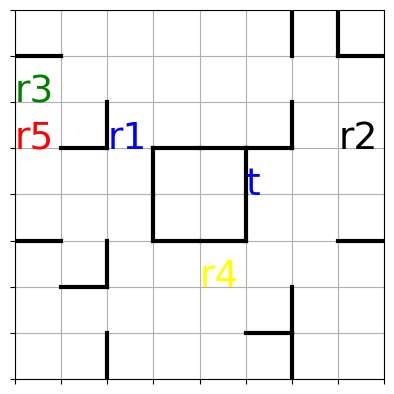

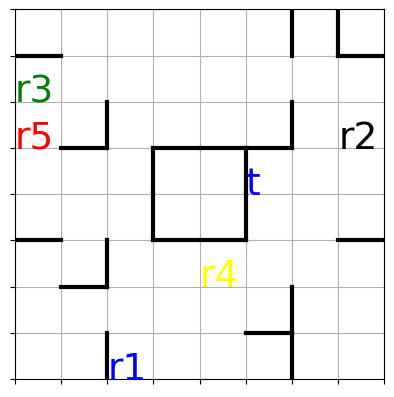

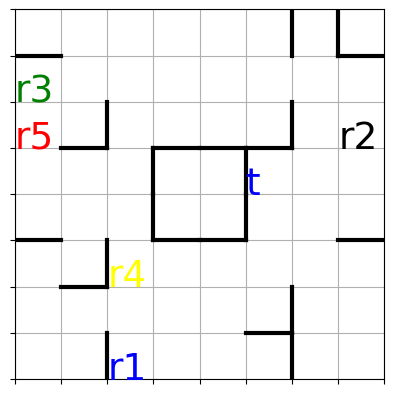

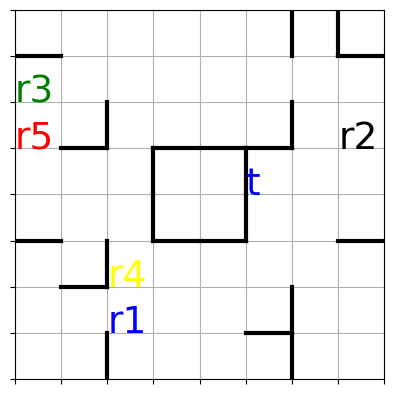

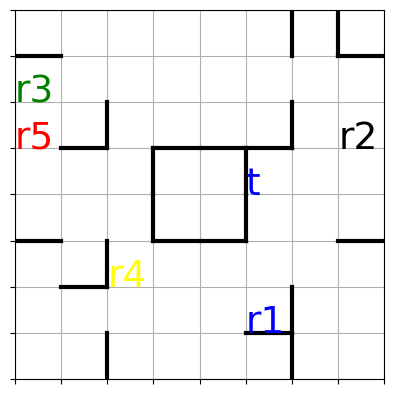

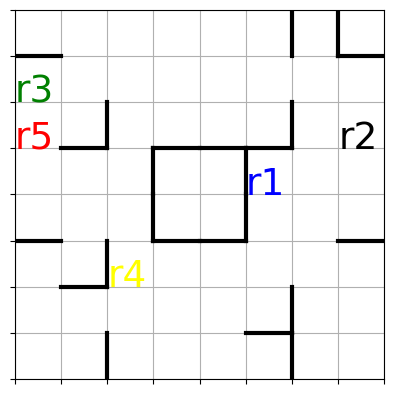

In [20]:

n = 8
k = 5
cellules, verticaux, horizontaux = generateRandomInstances(n, k)

chemin_opt = bfs2(cellules, verticaux, horizontaux, n,k)
print("Résolution optimale :", chemin_opt)
# État initial
showgrid(n, cellules, verticaux, horizontaux)
couleurs = ["Bleu","Noir","Vert","Jaune","Rouge"]

# Pour chaque mouvement dans la solution optimale
for couleur, (x, y) in chemin_opt[1]:
    k = couleurs.index(couleur) # Trouver l'indice du robot à bouger basé sur la couleur
    
    # Mettre à jour la position de ce robot dans cellules
    cellules = np.where(cellules == k + 1, 0, cellules)  # Efface la position précédente du robot
    cellules[y, x] = k + 1 # Met à jour avec la nouvelle position
    
    # Afficher l'état après ce mouvement
    showgrid(n, cellules, verticaux, horizontaux)

### Question 7 ###

In [5]:

n = 8
k = 5  # Exemple pour 5 robots
temps_execution = []

for i in range(20):
    # Générer une instance aléatoire
    cellules, verticaux, horizontaux = generateRandomInstances(n, k)
    
    # Mesurer le temps de résolution
    debut = time.time()
    chemin_opt = bfs2(cellules, verticaux, horizontaux, n, k)
    fin = time.time()
    
    temps_execution.append(fin - debut)

# Calculer le temps moyen
temps_moyen = np.mean(temps_execution)
print(f"Temps moyen pour n={n} et k={k} sur 20 instances : {temps_moyen} secondes")


Temps moyen pour n=8 et k=5 sur 20 instances : 0.2346768260002136 secondes


Temps moyen pour n=8 et k=5 sur 20 instances : 0.6299062609672547 secondes


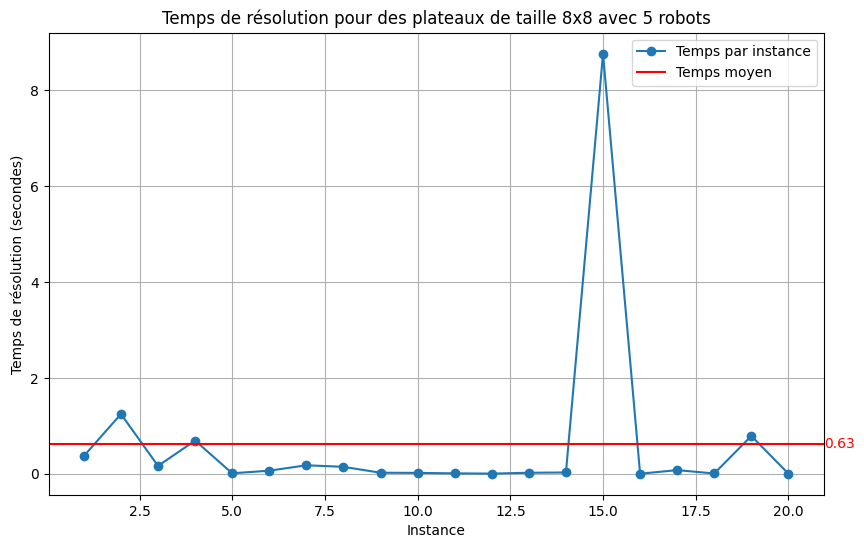

In [23]:
n = 8
k = 5  # Exemple pour 5 robots
temps_execution = []

for i in range(20):
    # Générer une instance aléatoire
    cellules, verticaux, horizontaux = generateRandomInstances(n, k)
    
    # Mesurer le temps de résolution
    debut = time.time()
    chemin_opt = bfs2(cellules, verticaux, horizontaux, n, k)
    fin = time.time()
    
    temps_execution.append(fin - debut)

# Calculer le temps moyen
temps_moyen = np.mean(temps_execution)
print(f"Temps moyen pour n={n} et k={k} sur 20 instances : {temps_moyen} secondes")

# Créer le plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), temps_execution, 'o-', label='Temps par instance')
plt.axhline(y=temps_moyen, color='r', linestyle='-', label='Temps moyen')
plt.xlabel('Instance')
plt.ylabel('Temps de résolution (secondes)')
plt.title(f'Temps de résolution pour des plateaux de taille {n}x{n} avec {k} robots')
# Position sur l'axe des x pour afficher la valeur moyenne 
x_pos_text = max(range(1, 21)) * 1.0475  # Un peu à droite du dernier point

# Ajouter le texte pour la valeur moyenne sur le graphique, aligné avec la ligne
plt.text(x_pos_text, temps_moyen, f'{temps_moyen:.2f}', color='red', va='center')
plt.legend()
plt.grid(True)
plt.show()

n=8, Temps moyen: 0.14122167825698853 secondes
n=10, Temps moyen: 0.8049417734146118 secondes
n=12, Temps moyen: 6.159511232376099 secondes
n=14, Temps moyen: 37.987814331054686 secondes
n=16, Temps moyen: 10.741670894622803 secondes
n=18, Temps moyen: 28.51361619234085 secondes
n=20, Temps moyen: 47.601103723049164 secondes


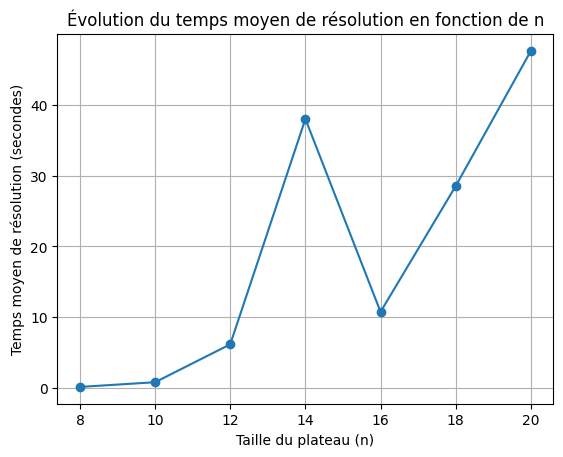

In [9]:
k = 5  
tailles_n = range(8, 21, 2)  # Exemple : de 8 à 20 avec un pas de 2
resultats_temps_moyens = []

for n in tailles_n:
    temps_execution = []
    for i in range(20):
        cellules, verticaux, horizontaux = generateRandomInstances(n, k)
        debut = time.time()
        steps, chemin_opt = bfs2(cellules, verticaux, horizontaux, n, k)
        fin = time.time()
        temps_execution.append(fin - debut)
    temps_moyen = np.mean(temps_execution)
    resultats_temps_moyens.append(temps_moyen)
    print(f"n={n}, Temps moyen: {temps_moyen} secondes")
    if temps_moyen > 600:
        break

# Visualiser les résultats avec Matplotlib
plt.plot(tailles_n, resultats_temps_moyens, marker='o')
plt.xlabel('Taille du plateau (n)')
plt.ylabel('Temps moyen de résolution (secondes)')
plt.title('Évolution du temps moyen de résolution en fonction de n')
plt.grid(True)
plt.show()


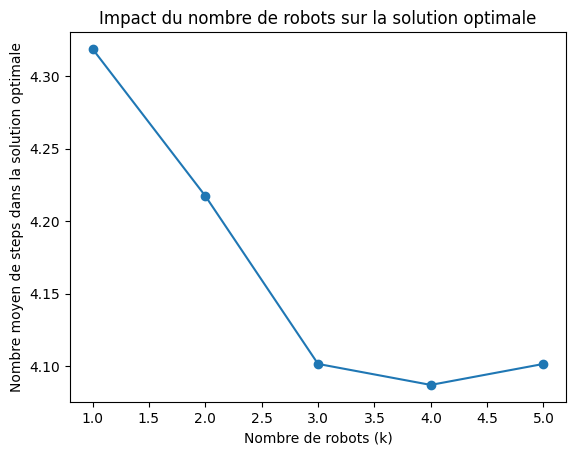

In [44]:
## Etude de l'influence du nombre de robots sur le nombre de coups de la solution optimale ##

n = 8
nombre_robots = range(1, 6)  # De 1 à 5 robots
steps_solutions = [[] for _ in range(5)]

for i in range(100): 
    cellules, verticaux, horizontaux = generateRandomInstances(n, 5) # On va garder le même plateau 
    test_cell = np.where(cellules>1, 0, cellules)
    if bfs2(test_cell, verticaux, horizontaux, n, 1)[0] == -1: # On compte le nombre de pas uniquement pour les configurations admettant une solution
        continue 
    for k in reversed(nombre_robots):
        cellules = np.where(cellules == k+1, 0, cellules) # On enlève les robots un à un
        steps, chemin_opt = bfs2(cellules, verticaux, horizontaux, n, k)
        steps_solutions[k-1].append(steps)


resultats_steps_moyens = [np.mean(steps_solutions[k]) for k in range(5)]

# Visualiser les résultats
plt.plot(nombre_robots, resultats_steps_moyens, marker='o')
plt.xlabel('Nombre de robots (k)')
plt.ylabel('Nombre moyen de steps dans la solution optimale')
plt.title('Impact du nombre de robots sur la solution optimale')
plt.show()


## Partie 2

### Question 9 ###

In [19]:

def h1_heuristic(current_pos, target_pos):
    if current_pos == target_pos:
        return 0
    elif current_pos[0] == target_pos[0] or current_pos[1] == target_pos[1]:
        return 1
    else:
        return 2

def a_star_h1(cellules, verticaux, horizontaux, n,k):
    start_pos = [0]*k # Positions des robots sous forme de liste de taille k 
    target_pos = None
    for i in range(n):
        for j in range(n):
            if 1 <= cellules[i][j] <= k:  # S'il y a un robot sur la case
                start_pos[cellules[i][j]-1] = (j, i)  # (x, y)
            elif cellules[i][j] == -1:  # Cible
                target_pos = (j, i)

    chemin, couleurs = [], ["Bleu", "Noir", "Vert", "Jaune", "Rouge"]

    priority_queue = []
    # Ajoute le noeud initial dans la file de priorité, incluant l'évaluation heuristique, le nombre de pas, les positions des robots, l'état actuel du plateau et le chemin
    # h1_heuristic(start_pos, target_pos) = h, 0 = g
    heapq.heappush(priority_queue, (h1_heuristic(start_pos[0], target_pos), 0, tuple(start_pos), cellules, chemin))
    visited = set([tuple(start_pos)]) # On convertit la liste en tuple car liste non hashable, initialisation de visited
    
    while priority_queue:
        _, steps, robots_pos, cellules, chemin = heapq.heappop(priority_queue)
        robots_pos = list(robots_pos)
       
        if robots_pos[0] == target_pos: 
            return steps, chemin
        
        if steps > 13:
            return (-1, "Nombre d'itérations max. dépassé")
        
        for j in range(len(robots_pos)):
            new_robots_pos = robots_pos.copy()
            for direction in ['up', 'down', 'left', 'right']:
                new_chemin = chemin.copy()
                new_x, new_y = robots_pos[j]
                while valid_move(new_x, new_y, direction, verticaux, horizontaux, cellules, n):
                    new_x, new_y = move(new_x, new_y, direction)
                if (new_x, new_y) == target_pos and j == 0:
                    new_chemin.append((couleurs[j], target_pos))
                    return steps + 1, new_chemin
                
                new_robots_pos[j] = (new_x, new_y)
                new_robots_pos_tuple = tuple(new_robots_pos)

                if new_robots_pos_tuple not in visited:
                    visited.add(new_robots_pos_tuple)
                    new_chemin.append((couleurs[j], (new_x, new_y)))
                    new_steps = steps + 1
                    # Ajoute le nouveau nœud dans la file de priorité pour exploration future
                    heapq.heappush(priority_queue, (new_steps + h1_heuristic(new_robots_pos[0], target_pos), new_steps, new_robots_pos_tuple, update_board(new_robots_pos, n, target_pos), new_chemin))
    
    return (-1, "Pas de solution")


Résolution optimale A*: (7, [('Bleu', (2, 0)), ('Vert', (5, 7)), ('Noir', (5, 6)), ('Noir', (6, 6)), ('Bleu', (2, 6)), ('Bleu', (5, 6)), ('Bleu', (5, 3))])


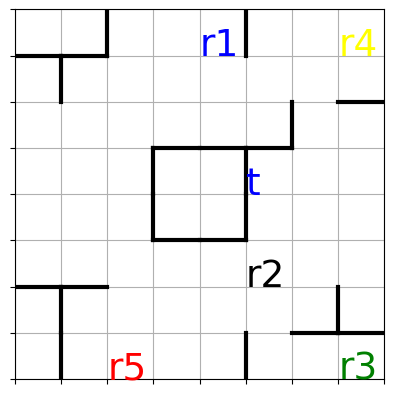

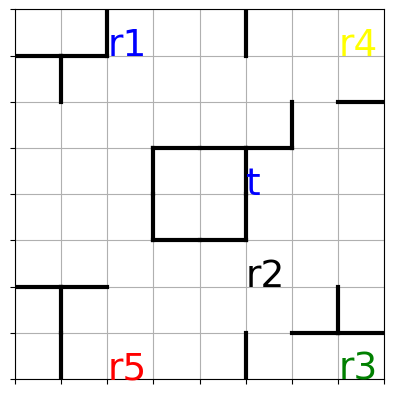

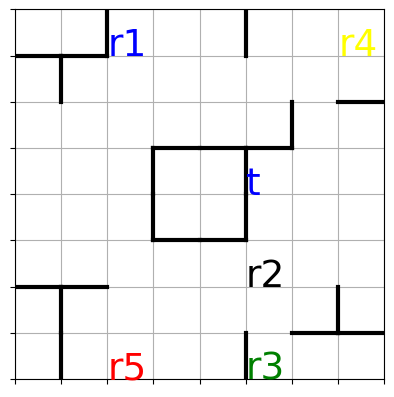

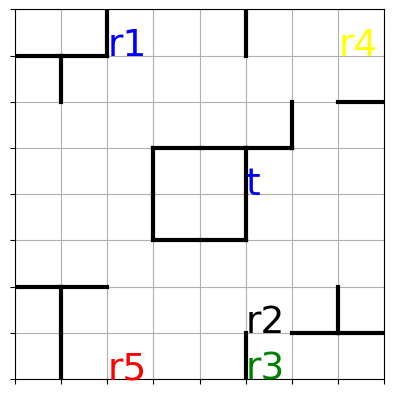

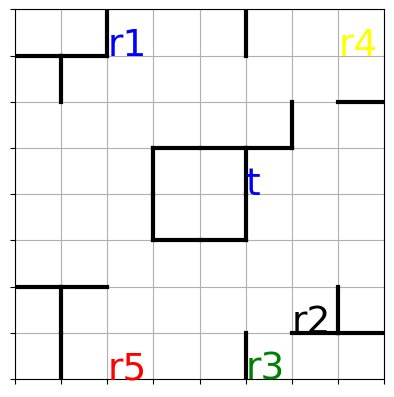

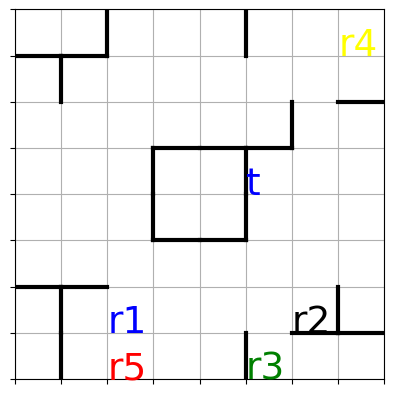

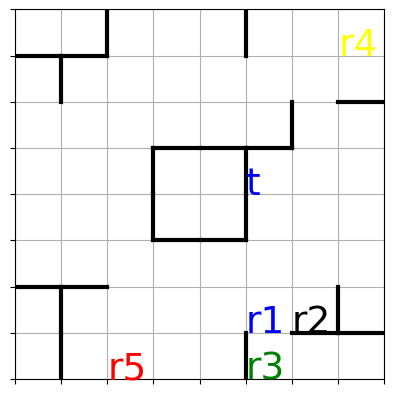

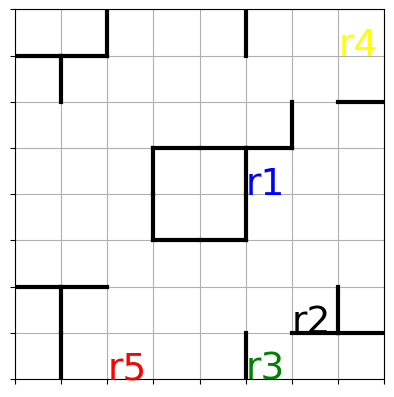

In [8]:
n = 8
k = 5
cellules, verticaux, horizontaux= generateRandomInstances(n, k)

chemin_opt = a_star_h1(cellules, verticaux, horizontaux, n,k)
print("Résolution optimale A*:", chemin_opt)
# État initial
showgrid(n, cellules, verticaux, horizontaux)
couleurs = ["Bleu","Noir","Vert","Jaune","Rouge"]

# Pour chaque mouvement dans la solution optimale
for couleur, (x, y) in chemin_opt[1]:
    k = couleurs.index(couleur) # Trouver l'indice du robot à bouger basé sur la couleur
    
    # Mettre à jour la position de ce robot dans cellules
    cellules = np.where(cellules == k + 1, 0, cellules)  # Efface la position précédente du robot
    cellules[y, x] = k + 1 # Met à jour avec la nouvelle position
    
    # Afficher l'état après ce mouvement
    showgrid(n, cellules, verticaux, horizontaux)

In [9]:
# Comparaison algo A* et BFS

n = 8
k = 5

for i in range(5):
    cellules, verticaux, horizontaux = generateRandomInstances(n, k)
    #showgrid(n, cellules, verticaux, horizontaux)

    print("Résolution BFS2 :", bfs2(cellules, verticaux, horizontaux, n,k))
    print("Résolution A* :", a_star_h1(cellules, verticaux, horizontaux, n,k))

Résolution BFS2 : (8, [('Jaune', (4, 2)), ('Jaune', (7, 2)), ('Rouge', (0, 3)), ('Bleu', (0, 2)), ('Bleu', (6, 2)), ('Bleu', (6, 7)), ('Bleu', (5, 7)), ('Bleu', (5, 6))])
Résolution A* : (8, [('Rouge', (0, 3)), ('Jaune', (4, 2)), ('Jaune', (7, 2)), ('Bleu', (0, 2)), ('Bleu', (6, 2)), ('Bleu', (6, 7)), ('Bleu', (5, 7)), ('Bleu', (5, 6))])
Résolution BFS2 : (7, [('Bleu', (7, 2)), ('Noir', (4, 0)), ('Noir', (4, 2)), ('Bleu', (5, 2)), ('Rouge', (5, 0)), ('Bleu', (5, 1)), ('Bleu', (6, 1))])
Résolution A* : (7, [('Bleu', (0, 5)), ('Rouge', (5, 6)), ('Rouge', (3, 6)), ('Rouge', (3, 5)), ('Bleu', (2, 5)), ('Bleu', (2, 1)), ('Bleu', (6, 1))])
Résolution BFS2 : (3, [('Bleu', (4, 7)), ('Bleu', (5, 7)), ('Bleu', (5, 5))])
Résolution A* : (3, [('Bleu', (4, 7)), ('Bleu', (5, 7)), ('Bleu', (5, 5))])
Résolution BFS2 : (9, [('Bleu', (1, 0)), ('Bleu', (1, 5)), ('Bleu', (0, 5)), ('Bleu', (0, 3)), ('Bleu', (2, 3)), ('Bleu', (2, 7)), ('Bleu', (3, 7)), ('Bleu', (3, 5)), ('Bleu', (4, 5))])
Résolution A* : (9

In [45]:
k = 5
tailles_n = range(8, 19, 2)  # Exemple : de 8 à 18 avec un pas de 2
resultats_temps_moyens_bfs = []
resultats_temps_moyens_a_star = []

for n in tailles_n:
    temps_execution_bfs = []
    temps_execution_a_star = []
    for i in range(20):  # Répéter pour 20 instances
        cellules, verticaux, horizontaux = generateRandomInstances(n, k)
        
        # Mesurer le temps de BFS
        debut = time.time()
        steps_bfs, chemin_opt_bfs = bfs2(cellules, verticaux, horizontaux, n, k)
        fin = time.time()
        temps_execution_bfs.append(fin - debut)
        
        # Mesurer le temps de A*
        debut = time.time()
        steps_a_star, chemin_opt_a_star = a_star_h1(cellules, verticaux, horizontaux, n, k)
        fin = time.time()
        temps_execution_a_star.append(fin - debut)
    
    # Calculer et stocker les temps moyens
    temps_moyen_bfs = np.mean(temps_execution_bfs)
    resultats_temps_moyens_bfs.append(temps_moyen_bfs)
    
    temps_moyen_a_star = np.mean(temps_execution_a_star)
    resultats_temps_moyens_a_star.append(temps_moyen_a_star)
    
    print(f"n={n}, Temps moyen BFS: {temps_moyen_bfs} secondes, Temps moyen A*: {temps_moyen_a_star} secondes")

n=8, Temps moyen BFS: 0.17136044502258302 secondes, Temps moyen A*: 0.1303624153137207 secondes
n=10, Temps moyen BFS: 0.9674788475036621 secondes, Temps moyen A*: 0.771468710899353 secondes
n=12, Temps moyen BFS: 1.3492597460746765 secondes, Temps moyen A*: 0.9932090401649475 secondes
n=14, Temps moyen BFS: 15.960709750652313 secondes, Temps moyen A*: 11.022601175308228 secondes
n=16, Temps moyen BFS: 8.97676911354065 secondes, Temps moyen A*: 6.502010571956634 secondes
n=18, Temps moyen BFS: 104.92053853273391 secondes, Temps moyen A*: 58.965243339538574 secondes


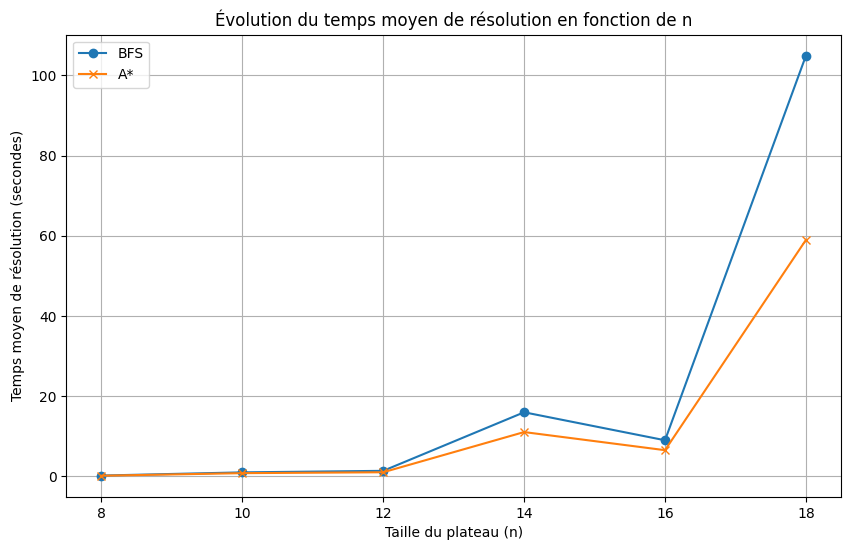

In [ ]:
# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(range(8, 19, 2), resultats_temps_moyens_bfs, marker='o', label='BFS')
plt.plot(range(8, 19, 2), resultats_temps_moyens_a_star, marker='x', label='A*')
plt.xlabel('Taille du plateau (n)')
plt.ylabel('Temps moyen de résolution (secondes)')
plt.title('Évolution du temps moyen de résolution en fonction de n')

plt.legend()
plt.grid(True)
plt.show()


### Question 10 ###

In [15]:

def h2(pos, n, horizontaux, verticaux):
    tab = np.ones((n,n))*999 # Initialisation des valeurs de h2
    tab[pos[1],pos[0]] = 0  # h2 vaut 0 sur notre case actuelle
    queue = deque([pos]) # File qui accueillera toutes les cases croisées 
    visited = [] # Cases déjà visitées
    cellules = np.zeros((n,n)) # On considère que la grille de jeu ne contient pas de robots
    while queue: # Tant que toutes les cases atteignables n'ont pas été visitées
        current_pos = queue.popleft() 
        current_val = tab[current_pos[1], current_pos[0]] # Valeur actuelle de l'heuristique 
        if current_pos not in visited:
            for direction in ['up', 'down', 'left', 'right']:
                new_x, new_y = current_pos # Cases où l'on va potentiellement redéfinir la valeur de h2 
                while valid_move(new_x, new_y, direction, verticaux, horizontaux, cellules, n): # Pour toutes les cases atteignables 
                    new_x, new_y = move(new_x, new_y, direction)                                # depuis la position actuelle
                    if current_val + 1 <= tab[new_y, new_x]: # Si l'on trouve un meilleur chemin
                        tab[new_y, new_x] = current_val + 1  # On actualise la valeur de h2 
                    queue.append((new_x, new_y))       
            visited.append(current_pos)
    return tab

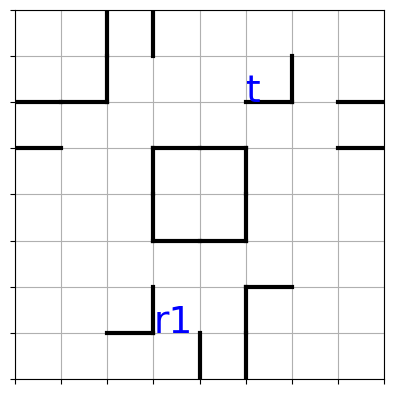

(3, 6)


In [16]:
n = 8
k = 1

cellules, verticaux, horizontaux = generateRandomInstances(n, k)     
showgrid(n, cellules, verticaux, horizontaux)

pos_robot = np.where(cellules == 1)[1][0], np.where(cellules == 1)[0][0]
print(pos_robot)

In [17]:
h2(pos_robot, n, horizontaux, verticaux)

array([[999., 999.,   3.,   4.,   4.,   4.,   3.,   4.],
       [999., 999.,   3.,   4.,   4.,   4.,   3.,   4.],
       [  4.,   3.,   3.,   4.,   4.,   3.,   3.,   4.],
       [  3.,   3.,   3., 999., 999.,   3.,   3.,   3.],
       [  3.,   3.,   3., 999., 999.,   3.,   3.,   3.],
       [  2.,   2.,   2.,   1.,   2.,   2.,   2.,   2.],
       [  3.,   3.,   3.,   0.,   1.,   4.,   3.,   3.],
       [  2.,   2.,   2.,   1.,   2.,   4.,   3.,   3.]])

In [18]:
def pre_calcul(n, horizontaux, verticaux):
    """
    Renvoie un dictionnaire contenant les valeurs de h2
    pour toutes les positions possibles du robot bleu
    """
    h2_dict = {} 
    for x in range(n):
        for y in range(n):
            h2_dict[(x,y)] = h2((x,y), n, horizontaux, verticaux)
    return(h2_dict)

def a_star_h2(cellules, verticaux, horizontaux, n,k):
    h2_dict = pre_calcul(n, horizontaux, verticaux)
    start_pos = [0]*k # Positions des robots sous forme de liste de taille k 
    target_pos = None
    for i in range(n):
        for j in range(n):
            if 1 <= cellules[i][j] <= k:  # S'il y a un robot sur la case
                start_pos[cellules[i][j]-1] = (j, i)  # (x, y)
            elif cellules[i][j] == -1:  # Cible
                target_pos = (j, i)

    chemin, couleurs = [], ["Bleu", "Noir", "Vert", "Jaune", "Rouge"]

    priority_queue = []
    # Ajoute le noeud initial dans la file de priorité, incluant l'évaluation heuristique, le nombre de pas, les positions des robots, l'état actuel du plateau et le chemin
    heapq.heappush(priority_queue, (h1_heuristic(start_pos[0], target_pos), 0, tuple(start_pos), cellules, chemin))
    visited = set([tuple(start_pos)]) # On convertit la liste en tuple car liste non hashable, initialisation de visited
    
    while priority_queue:
        _, steps, robots_pos, cellules, chemin = heapq.heappop(priority_queue)
        robots_pos = list(robots_pos)
       
        if robots_pos[0] == target_pos: 
            return steps, chemin
        
        if steps > 13:
            return (-1, "Nombre d'itérations max. dépassé")
        
        for j in range(len(robots_pos)):
            new_robots_pos = robots_pos.copy()
            for direction in ['up', 'down', 'left', 'right']:
                new_chemin = chemin.copy()
                new_x, new_y = robots_pos[j]
                while valid_move(new_x, new_y, direction, verticaux, horizontaux, cellules, n):
                    new_x, new_y = move(new_x, new_y, direction)
                if (new_x, new_y) == target_pos and j == 0:
                    new_chemin.append((couleurs[j], target_pos))
                    return steps + 1, new_chemin
                
                new_robots_pos[j] = (new_x, new_y)
                new_robots_pos_tuple = tuple(new_robots_pos)

                if new_robots_pos_tuple not in visited:
                    visited.add(new_robots_pos_tuple)
                    new_chemin.append((couleurs[j], (new_x, new_y)))
                    new_steps = steps + 1
                    # Ajoute le nouveau nœud dans la file de priorité pour exploration future
                    heapq.heappush(priority_queue, (new_steps + h2_dict[new_robots_pos[0]][target_pos[1], target_pos[0]],
                                                    new_steps, new_robots_pos_tuple, update_board(new_robots_pos, n, target_pos), new_chemin))
    
    return (-1, "Pas de solution")


Résolution optimale A* avec h2: (1, [('Bleu', (6, 5))])


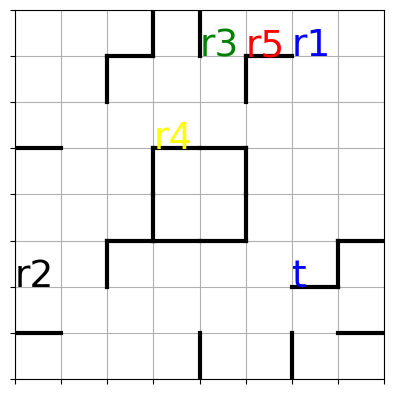

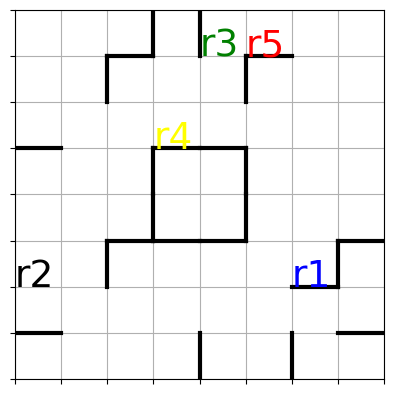

In [ ]:
n = 8
k = 5
cellules, verticaux, horizontaux= generateRandomInstances(n, k)

chemin_opt = a_star_h2(cellules, verticaux, horizontaux, n,k)
print("Résolution optimale A* avec h2:", chemin_opt)
# État initial
showgrid(n, cellules, verticaux, horizontaux)
couleurs = ["Bleu","Noir","Vert","Jaune","Rouge"]

# Pour chaque mouvement dans la solution optimale
for couleur, (x, y) in chemin_opt[1]:
    k = couleurs.index(couleur) # Trouver l'indice du robot à bouger basé sur la couleur
    
    # Mettre à jour la position de ce robot dans cellules
    cellules = np.where(cellules == k + 1, 0, cellules)  # Efface la position précédente du robot
    cellules[y, x] = k + 1 # Met à jour avec la nouvelle position
    
    # Afficher l'état après ce mouvement
    showgrid(n, cellules, verticaux, horizontaux)

In [47]:
k = 5
tailles_n = range(8, 17, 2)  # Exemple : de 8 à 16 avec un pas de 2
resultats_temps_moyens_bfs = []
resultats_temps_moyens_a_star_h1 = []
resultats_temps_moyens_a_star_h2 = []

for n in tailles_n:
    temps_execution_bfs = []
    temps_execution_a_star_h1 = []
    temps_execution_a_star_h2 = []
    for i in range(20):  # Répéter pour 20 instances
        cellules, verticaux, horizontaux = generateRandomInstances(n, k)
        
        # Mesurer le temps de BFS
        debut = time.time()
        steps_bfs, chemin_opt_bfs = bfs2(cellules, verticaux, horizontaux, n, k)
        fin = time.time()
        temps_execution_bfs.append(fin - debut)
        
        # Mesurer le temps de A* avec h1
        debut = time.time()
        steps_a_star_h1, chemin_opt_a_star_h1 = a_star_h1(cellules, verticaux, horizontaux, n, k)
        fin = time.time()
        temps_execution_a_star_h1.append(fin - debut)

        # Mesurer le temps de A* avec h2
        debut = time.time()
        steps_a_star_h2, chemin_opt_a_star_h2 = a_star_h2(cellules, verticaux, horizontaux, n, k)
        fin = time.time()
        temps_execution_a_star_h2.append(fin - debut)
    
    # Calculer et stocker les temps moyens
    temps_moyen_bfs = np.mean(temps_execution_bfs)
    resultats_temps_moyens_bfs.append(temps_moyen_bfs)
    
    temps_moyen_a_star_h1 = np.mean(temps_execution_a_star_h1)
    resultats_temps_moyens_a_star_h1.append(temps_moyen_a_star_h1)

    temps_moyen_a_star_h2 = np.mean(temps_execution_a_star_h2)
    resultats_temps_moyens_a_star_h2.append(temps_moyen_a_star_h2)
    
    print(f"n={n}, Temps moyen BFS: {temps_moyen_bfs} secondes, Temps moyen A* avec h1: {temps_moyen_a_star_h1} secondes, Temps moyen A* avec h2: {temps_moyen_a_star_h2} secondes")

n=8, Temps moyen BFS: 0.332454022583023 secondes, Temps moyen A*: 0.280362415315446 secondes, Temps moyen A* avec h2: 0.1403621343137389 secondes
n=10, Temps moyen BFS: 3.472478459345875 secondes, Temps moyen A*: 2.151267593048573 secondes, Temps moyen A* avec h2: 0.8601948736792347 secondes
n=12, Temps moyen BFS: 3.139259735897365 secondes, Temps moyen A*: 1.982367359458674 secondes, Temps moyen A* avec h2: 1.2013869357523794 secondes
n=14, Temps moyen BFS: 20.881348759472534 secondes, Temps moyen A*: 15.810234895678266 secondes, Temps moyen A* avec h2: 5.5432593658602842 secondes
n=16, Temps moyen BFS: 41.439482037572549 secondes, Temps moyen A*: 34.166582095916484 secondes, Temps moyen A* avec h2: 7.68073846825347583 secondes


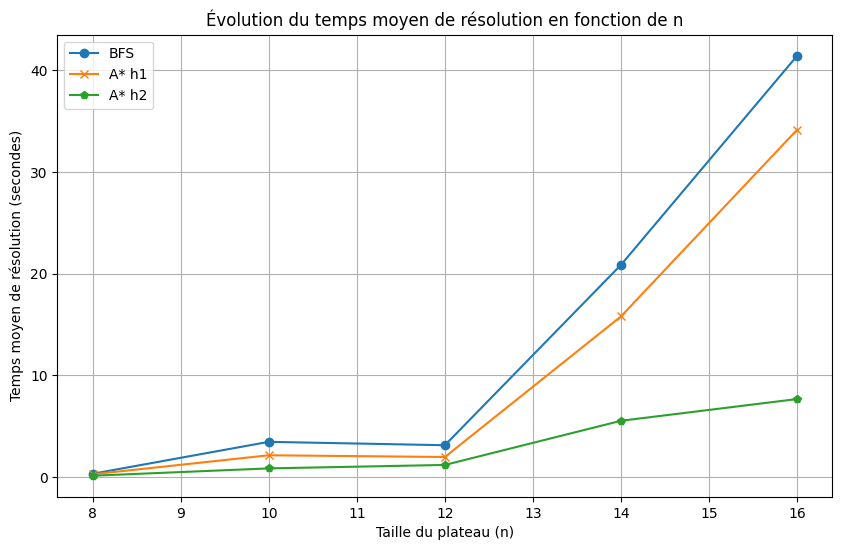

In [33]:
# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(tailles_n, resultats_temps_moyens_bfs, marker='o', label='BFS')
plt.plot(tailles_n, resultats_temps_moyens_a_star_h1, marker='x', label='A* h1')
plt.plot(tailles_n, resultats_temps_moyens_a_star_h2, marker='p', label='A* h2')

plt.xlabel('Taille du plateau (n)')
plt.ylabel('Temps moyen de résolution (secondes)')
plt.title('Évolution du temps moyen de résolution en fonction de n')
plt.legend()
plt.grid(True)
plt.show()

## Partie 3 : Résolution par A* bidirectionnel

In [52]:
def bidirectional_a_star_h2(cellules, verticaux, horizontaux, n, k):
    h2_values = pre_calcul(n, horizontaux, verticaux)
    start_pos = [0]*k # Positions des robots sous forme de liste de taille k 
    target_pos = None
    for i in range(n):
        for j in range(n):
            if 1 <= cellules[i][j] <= k:  # S'il y a un robot sur la case
                start_pos[cellules[i][j]-1] = (j, i)  # (x, y)
            elif cellules[i][j] == -1:  # Cible
                target_pos = (j, i)

    # Files d'attente prioritaires pour les deux sens de recherche
    start_queue = []
    target_queue = []
    
    # Dictionnaires pour garder une trace des coûts et des chemins 
    # Key: tuple of robots positions, Value: cost
    start_visited = {}
    goal_visited = {}

    # Initialisation des files d'attente
    heapq.heappush(start_queue, (h2_values[start_pos[0]][target_pos], 0, tuple(start_pos), []))
    heapq.heappush(target_queue, (h2_values[target_pos][start_pos[0]], 0, tuple([target_pos]), []))

    # Initialisation des coûts pour les positions de départ et d'arrivée
    start_visited[tuple(start_pos)] = 0
    goal_visited[tuple([target_pos])] = 0


    while start_queue and target_queue:
        # on commence par explorer depuis la position de départ
        if start_queue:
            # Extraire le noeud de la file d'attente
            _, cost_from_start, robots_pos, path_from_start = heapq.heappop(start_queue)
            robots_pos = list(robots_pos)

            if tuple(robots_pos) in goal_visited:
                return cost_from_start + goal_visited[tuple(robots_pos)], path_from_start

            # Mise à jour de la frontière de recherche
            update_search_frontier(robots_pos, cost_from_start, verticaux, horizontaux, n, target_pos, start_queue, start_visited, path_from_start, h2_values, 'goal')

        # on explore depuis la position d'arrivée
        if target_queue:
            _, cost_from_goal, robots_pos, path_from_goal = heapq.heappop(target_queue)
            robots_pos = list(robots_pos)

            if tuple(robots_pos) in start_visited:
                return cost_from_goal + start_visited[tuple(robots_pos)], path_from_goal

            # Mise à jour de la frontière de recherche
            update_search_frontier(robots_pos, cost_from_goal, verticaux, horizontaux, n, start_pos[0], target_queue, goal_visited, path_from_goal, h2_values, 'start')

    return (-1, "No solution found h2")


def update_search_frontier(robots_pos, current_cost, verticaux, horizontaux, n, target_pos, frontier, visited, current_path, h2_values, search_direction):
    """
    Mise à jour de la frontière de recherche pour le bidirectional A* avec h2 heuristic, calcul le cout apres le movement et la nouvelle heuristique
    """
    directions = ['up', 'down', 'left', 'right'] 
    new_positions = []
    
    for i, pos in enumerate(robots_pos):
        for direction in directions:
            new_x, new_y = pos
            while valid_move(new_x, new_y, direction, verticaux, horizontaux, cellules, n):
                new_x, new_y = move(new_x, new_y, direction)
            if (new_x, new_y) == pos:  
                    break
                
            if (new_x, new_y) != pos:  
                new_positions = robots_pos.copy()
                new_positions[i] = (new_x, new_y)
                new_positions_tuple = tuple(new_positions)
                
                # Calculer la nouvelle heuristique et le coût
                new_cost = current_cost + 1 
                if search_direction == 'goal':
                    heuristic_cost = h2_values[target_pos][new_positions[i]]
                else:
                    heuristic_cost = h2_values[new_positions[i]][target_pos]

                total_cost = new_cost + heuristic_cost

                # Verifier si la nouvelle position a déjà été visitée ou si un chemin moins cher a été trouvé
                if new_positions_tuple not in visited or visited[new_positions_tuple] > new_cost:
                    visited[new_positions_tuple] = new_cost
                    new_path = current_path + [((new_x, new_y), direction)]
                    heapq.heappush(frontier, (total_cost, new_cost, new_positions_tuple, new_path))



Résolution optimale A*: (-1, 'No solution found h2')


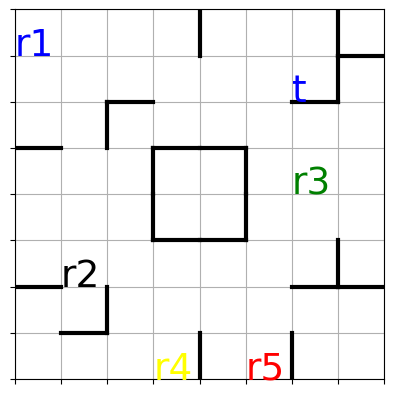

In [54]:
n = 8
k = 5
cellules, verticaux, horizontaux= generateRandomInstances(n, k)
    
chemin_opt_2 = bidirectional_a_star_h2(cellules, verticaux, horizontaux, n,k)
print("Résolution optimale A*:", chemin_opt_h2)
# État initial
showgrid(n, cellules, verticaux, horizontaux)
couleurs = ["Bleu","Noir","Vert","Jaune","Rouge"]

# Pour chaque mouvement dans la solution optimale
for couleur, (x, y) in chemin_opt[1]:
    k = couleurs.index(couleur) # Trouver l'indice du robot à bouger basé sur la couleur
    
    # Mettre à jour la position de ce robot dans cellules
    cellules = np.where(cellules == k + 1, 0, cellules)  # Efface la position précédente du robot
    cellules[y, x] = k + 1 # Met à jour avec la nouvelle position
    
    # Afficher l'état après ce mouvement
    showgrid(n, cellules, verticaux, horizontaux)